In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

csv_files = {
    '1_user': 'test_results(1 user).csv',
    '2_users': 'test_results(2 users).csv',
    '3_users': 'test_results(3 users).csv',
    '4_users': 'test_results(4 users).csv',
    '5_users': 'test_results(5 users).csv'
}

dataframes = {k: pd.read_csv(v) for k, v in csv_files.items()}

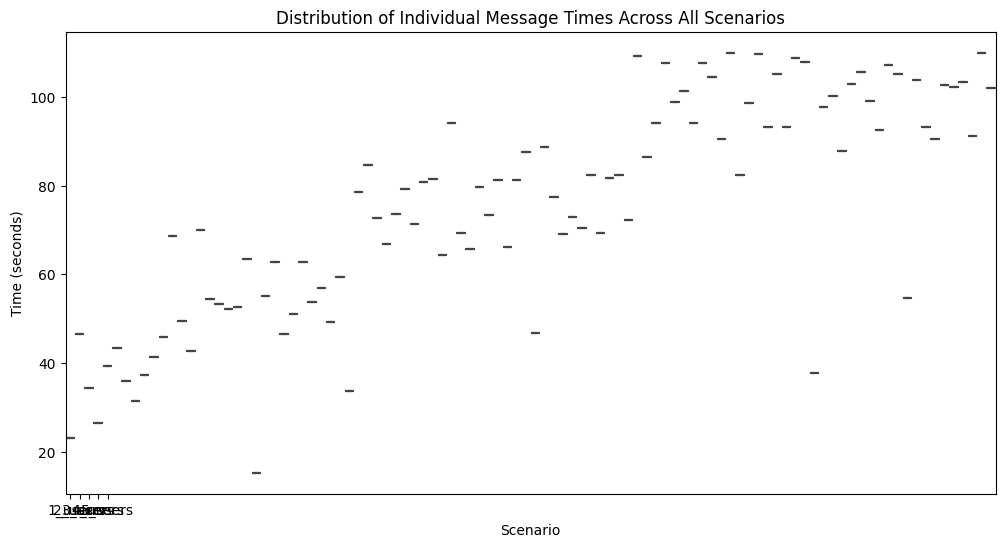

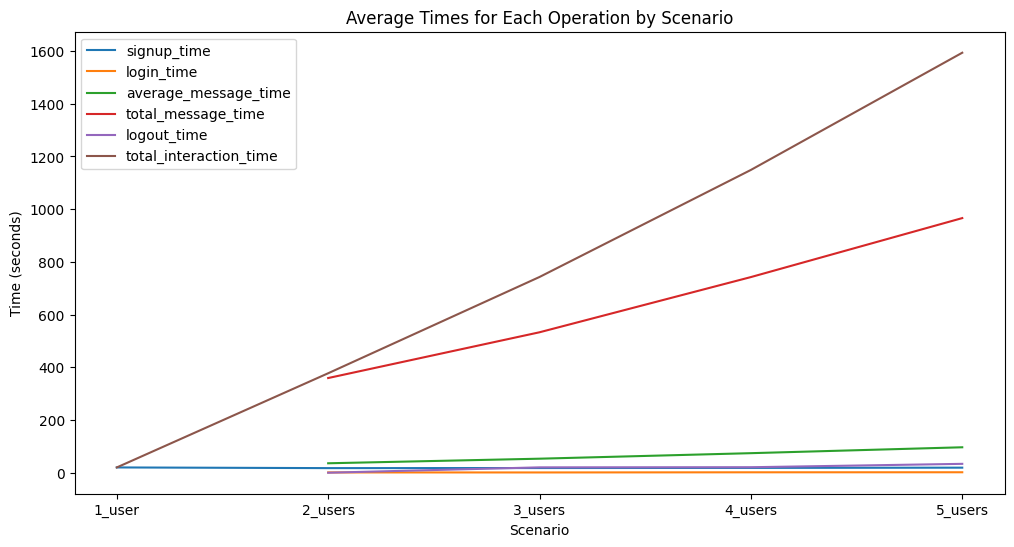

In [9]:
summary = {}

for label, df in dataframes.items():
    # Column 1: User ID
    # Column 2: Signup Time
    # Column 3: Login Time
    # Columns 4-13: Individual Message Times
    # Column 14: Total Message Time
    # Column 15: Logout Time
    # Columns 16 onward: Messages and Responses (alternating)
    
    summary[label] = {
        'signup_time_stats': df.iloc[:, 1].describe(),
        'login_time_stats': df.iloc[:, 2].describe(),
        'individual_message_time_stats': df.iloc[:, 3:13].stack().describe(),
        'total_message_time_stats': df.iloc[:, 13].describe(),
        'logout_time_stats': df.iloc[:, 14].describe(),
        'total_interaction_time': df.iloc[:, 1:15].sum(axis=1).describe()
    }

average_times = {
    'scenario': [],
    'signup_time': [],
    'login_time': [],
    'average_message_time': [],
    'total_message_time': [],
    'logout_time': [],
    'total_interaction_time': []
}

for label, stats in summary.items():
    average_times['scenario'].append(label)
    average_times['signup_time'].append(stats['signup_time_stats']['mean'])
    average_times['login_time'].append(stats['login_time_stats']['mean'])
    average_times['average_message_time'].append(stats['individual_message_time_stats']['mean'])
    average_times['total_message_time'].append(stats['total_message_time_stats']['mean'])
    average_times['logout_time'].append(stats['logout_time_stats']['mean'])
    average_times['total_interaction_time'].append(stats['total_interaction_time']['mean'])

# Convert to DataFrame for plotting
average_times_df = pd.DataFrame(average_times)

# Create boxplot for individual message times
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.concat([df.iloc[:, 3:13].stack() for df in dataframes.values()], axis=0))
plt.title('Distribution of Individual Message Times Across All Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Time (seconds)')
plt.xticks(ticks=range(len(dataframes)), labels=dataframes.keys())
plt.show()

# Create line plots for average times
plt.figure(figsize=(12, 6))
for column in average_times_df.columns[1:]:
    sns.lineplot(data=average_times_df, x='scenario', y=column, label=column)
plt.title('Average Times for Each Operation by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()



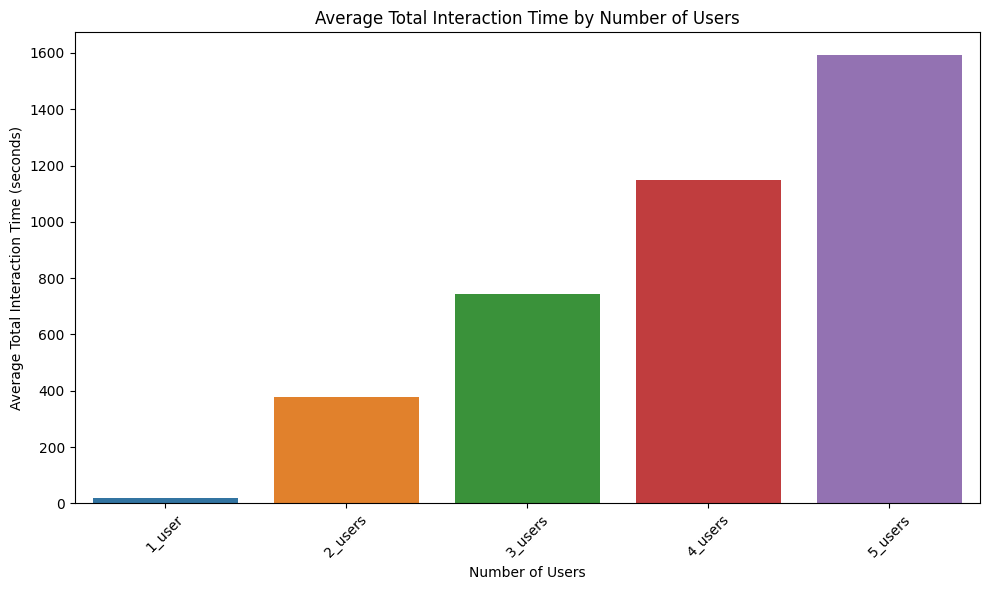

In [10]:
average_interaction_times = {
    'scenario': [],
    'average_total_interaction_time': []
}

for label, df in dataframes.items():
    total_interaction_time = df.iloc[:, 1:15].sum(axis=1)
    average_interaction_time = total_interaction_time.mean()
    average_interaction_times['scenario'].append(label)
    average_interaction_times['average_total_interaction_time'].append(average_interaction_time)

average_interaction_times_df = pd.DataFrame(average_interaction_times)

plt.figure(figsize=(10, 6))
sns.barplot(x='scenario', y='average_total_interaction_time', data=average_interaction_times_df)
plt.title('Average Total Interaction Time by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Average Total Interaction Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the x labels
plt.show()


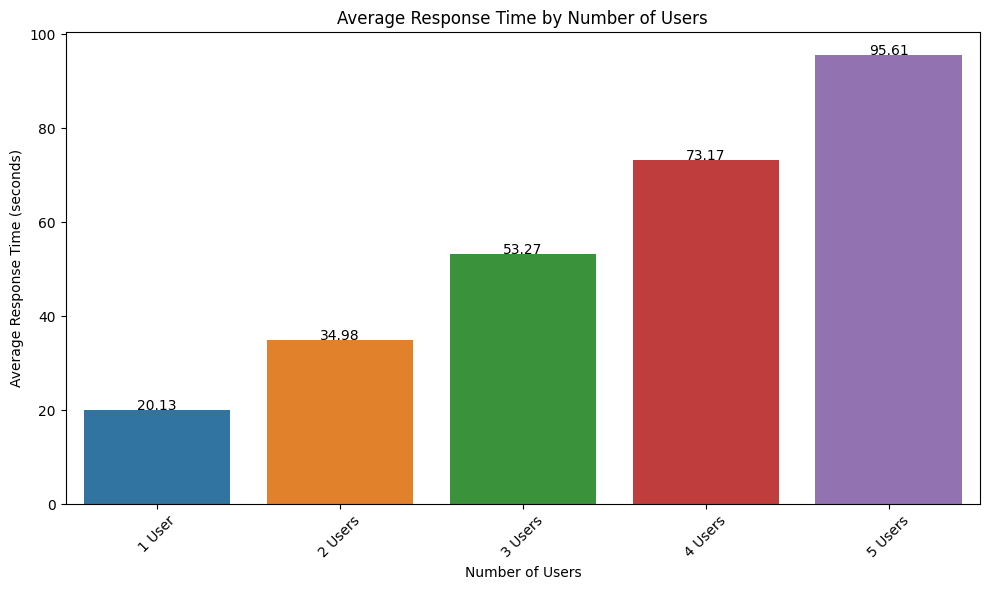

In [11]:
average_response_times = []
scenarios = ['1 User', '2 Users', '3 Users', '4 Users', '5 Users']

for i, scenario in enumerate(scenarios, start=1):
    df = pd.read_csv(f'test_results({scenario}).csv')
    avg_response_time = df.iloc[-1, 1] 
    average_response_times.append(avg_response_time)

average_response_times_df = pd.DataFrame({
    'scenario': scenarios,
    'average_response_time': average_response_times
})

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='scenario', y='average_response_time', data=average_response_times_df)
plt.title('Average Response Time by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Average Response Time (seconds)')
plt.xticks(rotation=45)

for index, row in average_response_times_df.iterrows():
    barplot.text(index, row['average_response_time'], round(row['average_response_time'], 2), color='black', ha="center")

plt.tight_layout()
plt.show()



In [12]:
!pip install nbconvert
